# TC2034 Modelación del Aprendizaje con Inteligencia Artificial
## Actividad 5. Aprendizaje no supervisado

- Sebastián Miramontes Soto - A01285296

- Raúl Correa Ocañas - A01722401

- Ericka Sofia Rodriguez Sanchez - A01571463

## 1. Importación de Librerías

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [ ]:
kmeans.n_iter_

10

In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2])

# 2. Método del Codo (Elbow Method)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

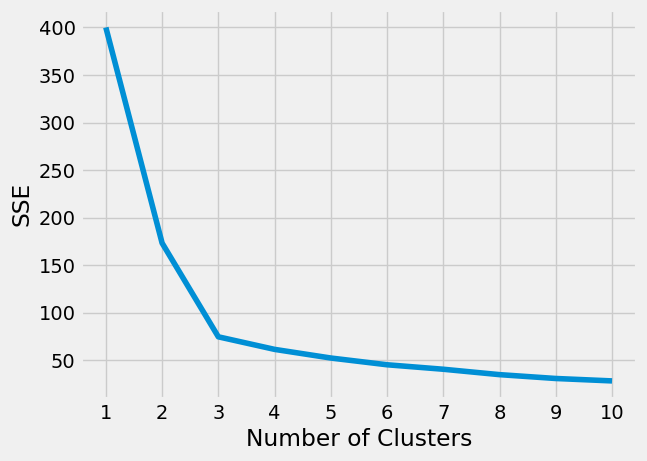

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
k1 = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [ ]:
k1.elbow

3

# 3. Método de la Silueta (Silhouette Method)

In [ ]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

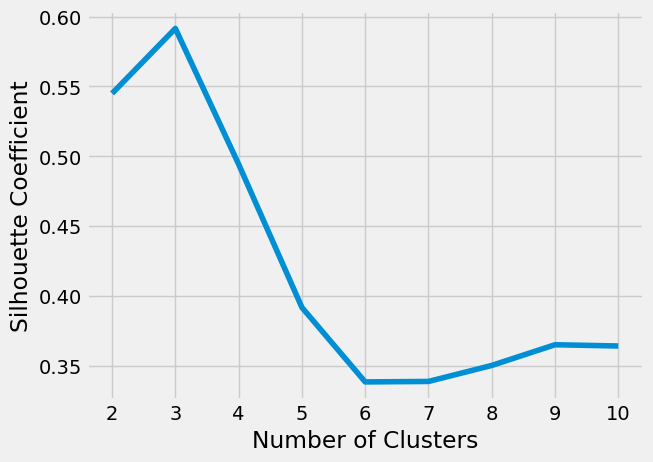

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# 4. Evaluación de los Modelos

- El método del codo y el coeficiente de silueta evalúan el rendimiento de la agrupación sin el uso de etiquetas de verdad.
- Las etiquetas de verdad clasifican los puntos de datos en grupos según la asignación realizada por un humano o un algoritmo existente.
- Este tipo de métricas hacen todo lo posible para sugerir la cantidad correcta de grupos, pero pueden resultar engañosas cuando se usan sin contexto.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round(2)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kmeans_silhouette

0.5

In [ ]:
dbscan_silhouette

0.38

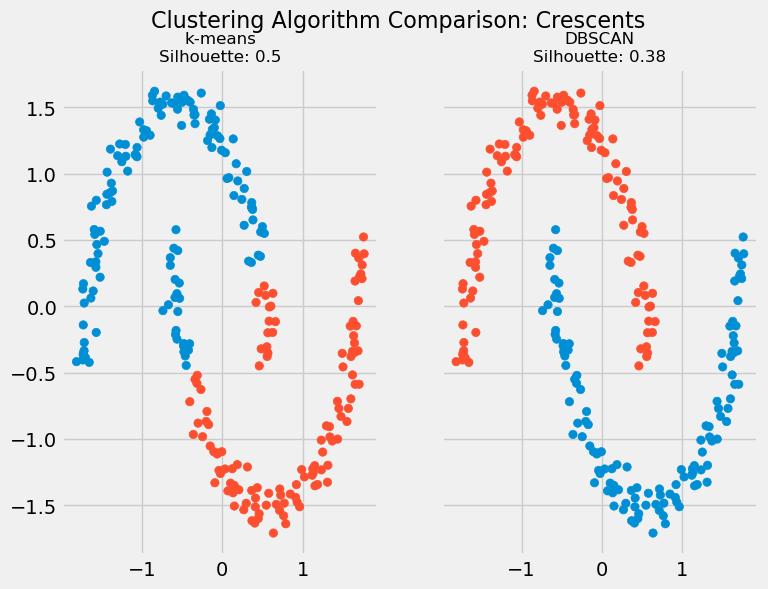

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)

fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}

km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()


In [ ]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [ ]:
round(ari_kmeans, 2), round(ari_dbscan, 2)

(0.47, 1.0)

# 5. Pipeline de K-Means

In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)
r = urllib.request.urlretrieve(full_download_url, archive_name)

tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [ ]:
data_dir = 'TCGA-PANCAN-HiSeq-801x20531\data.csv'
labels_dir = 'TCGA-PANCAN-HiSeq-801x20531\labels.csv'

data = np.genfromtxt(
    data_dir,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_dir,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype=str
)

In [ ]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [ ]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0], dtype=int64)

In [ ]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [ ]:
n_clusters = len(label_encoder.classes_)

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

clusterer = Pipeline(
    [
         (
              "kmeans",
              KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
              ),
         ),
    ]
)

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
silhouette_score(preprocessed_data, predicted_labels)

0.511877552845028

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

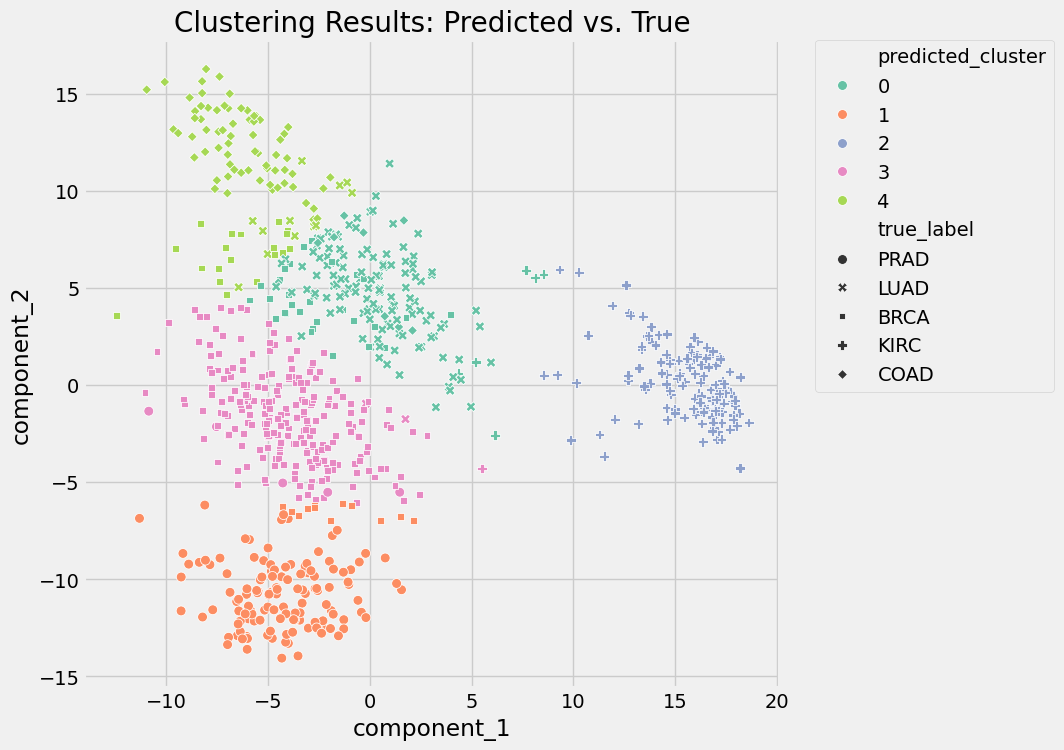

In [ ]:
pca_df = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"]
)

pca_df["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pca_df["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x= "component_1",
    y= "component_2",
    s=50,
    data=pca_df,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2"
)

scat.set_title(
    "Clustering Results: Predicted vs. True", fontsize=20
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [ ]:
silhouette_scores = []
ari_scores = []

for n in range(2, 11):
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )

    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

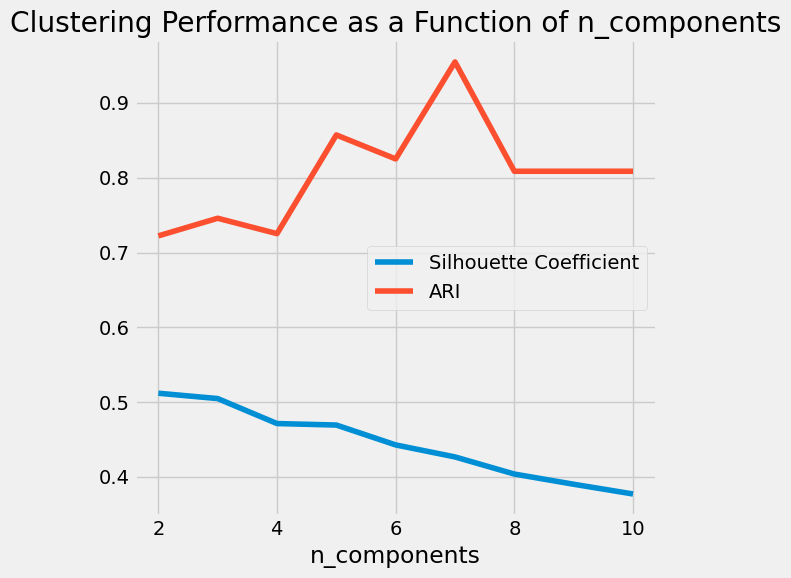

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
   range(2, 11),
   silhouette_scores,
   c="#008fd5",
   label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")
plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

# 6. Reflexión

Al trabajar con el método de aprendizaje no supervisado de K-Means, aprendí de las diferentes métricas utilizadas para identificar el mejor número de clusters que represente los datos. El artículo explicando el tutorial paso a paso para aplicar este modelo de aprendizaje automático describe dos distintos métodos: El método del codo y el método de la silueta. El primero consiste en graficar la SSE (sum of squares error) contra el número de clusters correspondiente, e identificar el punto en el que su dirección cambia drásticamente (haciendo una forma de codo). El segundo método, siendo el de la silueta, es obtener el cociente entre la distancia promedio de cada punto respecto a su propio cluster y la distancia promedio de ese punto a los puntos del cluster más cercano. Inferimos que los mejores modelos minimizan la distancia intra cluster promedio y maximizan la distancia promedio entre clusters. Sin embargo, aunque estos métodos pueden indicar que un numero de clusters es el ideal, estos modelos podrían ser erroneos. Aprendimos que es posible utilizar un set de datos etiquetados para comparar los resultados obtenidos por el modelo con la realidad. Es crucial recordar que estos no se dan como datos de entrenamiento, ya que se puede sesgar el modelo a saber la respuesta de antemano. Más adelante se aborda con un set de datos distintos el aplicar un PCA para disminuir la dimensionalidad de las variables, lo cual ayuda al KMeans a obtener mejores resultados usando menos variables. Consideramos que este método es significativo, ya que se logra hacer buenas predicciones de clustering si se utilizan los mejores 7 componentes del PCA. Esto nos permite evaluar gráficamente como mejorar los modelos implementados.